In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [288]:
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
# Este es otro dataset con el que quiero hacer la prueba de seleccionar más datos (géneros) 
#para añadir a mi dataset que estoy entrenando para ver si con más registros puedo mejorar la 
# clasificación de géneros en mi dataset final.
df_genres = pd.read_csv('/Users/alexvalles/dataset_spotify.csv')
df_genres

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [289]:
# Recuento de valores para cada género
recuento_generos = df_genres['track_genre'].value_counts()

print(recuento_generos)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


In [290]:

lista_generos = recuento_generos.index.tolist()


print(lista_generos)

['acoustic', 'punk-rock', 'progressive-house', 'power-pop', 'pop', 'pop-film', 'piano', 'party', 'pagode', 'opera', 'new-age', 'mpb', 'minimal-techno', 'metalcore', 'metal', 'mandopop', 'malay', 'latino', 'latin', 'kids', 'k-pop', 'jazz', 'j-rock', 'j-pop', 'j-idol', 'j-dance', 'iranian', 'psych-rock', 'punk', 'afrobeat', 'r-n-b', 'turkish', 'trip-hop', 'trance', 'techno', 'tango', 'synth-pop', 'swedish', 'study', 'spanish', 'soul', 'songwriter', 'sleep', 'ska', 'singer-songwriter', 'show-tunes', 'sertanejo', 'samba', 'salsa', 'sad', 'romance', 'rockabilly', 'rock', 'rock-n-roll', 'reggaeton', 'reggae', 'industrial', 'indie', 'indie-pop', 'indian', 'disney', 'disco', 'detroit-techno', 'deep-house', 'death-metal', 'dancehall', 'dance', 'country', 'comedy', 'club', 'classical', 'chill', 'children', 'chicago-house', 'cantopop', 'british', 'breakbeat', 'brazil', 'blues', 'bluegrass', 'black-metal', 'anime', 'ambient', 'alternative', 'alt-rock', 'drum-and-bass', 'dub', 'dubstep', 'groove', 

In [291]:
# Este es el dataset que voy a entrenar
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
df_sel_genres = pd.read_csv('/Users/alexvalles/spotify_all_genres_tracks.csv')
df_sel_genres

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492000,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910000,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150000,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597000,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663000,0.000000,0.122,0.566,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,2oGYxgu2ztDaf64of4edww,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Walking with Clouds,17,Transllusion,The Opening of the Cerebral Gate,https://i.scdn.co/image/ab67616d0000b2730c430e...,"['electro', 'techno']",14,...,1,0.0531,0.000028,0.756000,0.111,0.235,135.338,212160,4,electronic
9194,2TbbgHiwZVjErsxkTm63Lh,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Start To Move,23,Oscar Mulero,Mannequin,https://i.scdn.co/image/ab67616d0000b273abfdcb...,"['minimal dub', 'minimal techno', 'spanish tec...",27,...,1,0.1080,0.006870,0.939000,0.121,0.417,133.987,317483,3,electronic
9195,0Rwl08UX8lNW6Cn8eb068P,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Take Me Away - Truncate Remix,7,DJ 3000,Take Me Away,https://i.scdn.co/image/ab67616d0000b273371dce...,"['detroit techno', 'techno']",7,...,0,0.0506,0.000020,0.939000,0.117,0.181,130.012,355586,4,electronic
9196,1M33B7EKfhIx3xtEYjnoKz,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Funny,24,Mr. De',Follow the Leader 4,https://i.scdn.co/image/ab67616d0000b273ba561d...,"['electro', 'ghettotech', 'techno']",27,...,0,0.0743,0.027900,0.860000,0.112,0.687,147.998,236333,4,electronic


In [292]:
df_sel_genres.columns

Index(['track_id', 'playlist_url', 'playlist_name', 'track_name',
       'track_popularity', 'artist_name', 'album', 'album_cover',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

In [293]:
df_sel_genres = df_sel_genres.drop(['track_id', 'playlist_url', 'playlist_name','track_popularity',
                                   'album_cover','artist_genres','artist_popularity'], axis=1)
df_sel_genres

,track_name,artist_name,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,0.633,0.625,0,-10.951,1,0.0436,0.492000,0.000418,0.204,0.841,103.355,147800,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,0.728,0.054,11,-22.557,0,0.0380,0.910000,0.048000,0.120,0.425,78.033,338333,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.705,0.483,1,-12.209,1,0.0542,0.150000,0.026500,0.202,0.713,122.863,181786,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,0.745,0.436,5,-9.617,0,0.0430,0.597000,0.021300,0.610,0.771,114.216,188200,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,0.747,0.288,9,-14.435,1,0.0513,0.663000,0.000000,0.122,0.566,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,Walking with Clouds,Transllusion,The Opening of the Cerebral Gate,0.781,0.640,1,-9.453,1,0.0531,0.000028,0.756000,0.111,0.235,135.338,212160,4,electronic
9194,Start To Move,Oscar Mulero,Mannequin,0.717,0.833,1,-9.147,1,0.1080,0.006870,0.939000,0.121,0.417,133.987,317483,3,electronic
9195,Take Me Away - Truncate Remix,DJ 3000,Take Me Away,0.716,0.653,9,-11.225,0,0.0506,0.000020,0.939000,0.117,0.181,130.012,355586,4,electronic
9196,Funny,Mr. De',Follow the Leader 4,0.763,0.451,1,-10.230,0,0.0743,0.027900,0.860000,0.112,0.687,147.998,236333,4,electronic


In [294]:
# Recuento de valores para cada género
recuento_generos = df_sel_genres['genre'].value_counts()

print(recuento_generos)

genre
electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: count, dtype: int64


In [295]:
df_sel_genres.dtypes

track_name           object
artist_name          object
album                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [296]:
df_sel_genres['genre'] = df_sel_genres['genre'].astype('category')

In [297]:
df_sel_genres.isnull().sum()

track_name          0
artist_name         0
album               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [298]:
# adecuamos el dataset con las mismas columnas que el que vamos a
# entrenar para añadir más registros a los géneros

In [299]:
df_genres.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [300]:
df_genres.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [301]:
df_genres = df_genres.drop(['Unnamed: 0', 'track_id', 'explicit',
                           'popularity'], axis=1)
df_genres

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [302]:
# Define el nuevo orden de las columnas
# Define el nuevo orden de las columnas
new_order = ['track_name', 'album_name', 'artists', 'danceability', 'energy', 'key', 'loudness','mode', 
             'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
             'tempo', 'duration_ms', 'time_signature', 'track_genre']

# Reordena las columnas del DataFrame
df_genres = df_genres[new_order]

# Muestra el DataFrame resultante
df_genres


,track_name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_genre
0,Comedy,Comedy,Gen Hoshino,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666,4,acoustic
1,Ghost - Acoustic,Ghost (Acoustic),Ben Woodward,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610,4,acoustic
2,To Begin Again,To Begin Again,Ingrid Michaelson;ZAYN,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826,4,acoustic
3,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,Kina Grannis,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933,3,acoustic
4,Hold On,Hold On,Chord Overstreet,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Sleep My Little Boy,#mindfulness - Soft Rain for Mindful Meditatio...,Rainy Lullaby,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,384999,5,world-music
113996,Water Into Light,#mindfulness - Soft Rain for Mindful Meditatio...,Rainy Lullaby,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,385000,4,world-music
113997,Miss Perfumado,Best Of,Cesária Evora,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,271466,4,world-music
113998,Friends,Change Your World,Michael W. Smith,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,283893,4,world-music


In [303]:

nuevos_nombres = {'album_name': 'album', 'artists': 'artist_name','track_genre': 'genre'}

# Cambiamos el nombre de las columnas
df_genres.rename(columns=nuevos_nombres, inplace=True)


df_genres

,track_name,album,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Comedy,Comedy,Gen Hoshino,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666,4,acoustic
1,Ghost - Acoustic,Ghost (Acoustic),Ben Woodward,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610,4,acoustic
2,To Begin Again,To Begin Again,Ingrid Michaelson;ZAYN,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826,4,acoustic
3,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,Kina Grannis,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933,3,acoustic
4,Hold On,Hold On,Chord Overstreet,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Sleep My Little Boy,#mindfulness - Soft Rain for Mindful Meditatio...,Rainy Lullaby,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,384999,5,world-music
113996,Water Into Light,#mindfulness - Soft Rain for Mindful Meditatio...,Rainy Lullaby,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,385000,4,world-music
113997,Miss Perfumado,Best Of,Cesária Evora,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,271466,4,world-music
113998,Friends,Change Your World,Michael W. Smith,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,283893,4,world-music


'acoustic', 'punk-rock', 'progressive-house', 'power-pop', 'pop', 'pop-film', 'piano', 'party', 'pagode', 'opera', 'new-age', 'mpb', 'minimal-techno', 'metalcore', 'metal', 'mandopop', 'malay', 'latino', 'latin', 'kids', 'k-pop', 'jazz', 'j-rock', 'j-pop', 'j-idol', 'j-dance', 'iranian', 'psych-rock', 'punk', 'afrobeat', 'r-n-b', 'turkish', 'trip-hop', 'trance', 'techno', 'tango', 'synth-pop', 'swedish', 'study', 'spanish', 'soul', 'songwriter', 'sleep', 'ska', 'singer-songwriter', 'show-tunes', 'sertanejo', 'samba', 'salsa', 'sad', 'romance', 'rockabilly', 'rock', 'rock-n-roll', 'reggaeton', 'reggae', 'industrial', 'indie', 'indie-pop', 'indian', 'disney', 'disco', 'detroit-techno', 'deep-house', 'death-metal', 'dancehall', 'dance', 'country', 'comedy', 'club', 'classical', 'chill', 'children', 'chicago-house', 'cantopop', 'british', 'breakbeat', 'brazil', 'blues', 'bluegrass', 'black-metal', 'anime', 'ambient', 'alternative', 'alt-rock', 'drum-and-bass', 'dub', 'dubstep', 'groove', 'idm', 'house', 'honky-tonk', 'hip-hop', 'heavy-metal', 'hardstyle', 'hardcore', 'hard-rock', 'happy', 'guitar', 'grunge', 'grindcore', 'edm', 'goth', 'gospel', 'german', 'garage', 'funk', 'french', 'forro', 'folk', 'emo', 'electronic', 'electro', 'world-music']

In [304]:
selected_genres = df_genres[df_genres['genre'].isin(['metal', 'rock', 'pop','british',
                                                          'reggae', 'electronic',
                                                          'alternative', 'jazz', 'heavy-metal',
                                                          'death_metal', 'techno', 'minimal-techno',
                                                          'classical','deep-house', 'hip-hop',
                                                          'electro','trance','hard-rock',
                                                        'black-metal','punk-rock', 'garage',
                                                        'blues', 'r-n-b', 'power-pop, indie-pop',
                                                    'alt-rock', 'grunge','death-metal',
                                                    'j-rock', 'j-pop', 'soul'])]
selected_genres


,track_name,album,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
2000,Daddy Issues,Wiped Out!,The Neighbourhood,0.588,0.521,10,-9.461,1,0.0329,0.067800,0.149000,0.1230,0.3370,85.012,260173,4,alt-rock
2001,Little Dark Age,Little Dark Age,MGMT,0.705,0.712,6,-6.156,1,0.0385,0.010200,0.000855,0.1000,0.6200,97.512,299960,4,alt-rock
2002,Softcore,Hard To Imagine The Neighbourhood Ever Changing,The Neighbourhood,0.575,0.568,9,-5.509,0,0.0300,0.048400,0.000417,0.2860,0.3700,93.986,206280,4,alt-rock
2003,Sweater Weather,I Love You.,The Neighbourhood,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.017700,0.1010,0.3980,124.053,240400,4,alt-rock
2004,You Get Me So High,Hard To Imagine The Neighbourhood Ever Changing,The Neighbourhood,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.3870,88.036,153000,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110995,Divergence - Radio Edit,"Syncopy Radio Edits, Vol. 1",NG Rezonance;PHD,0.148,0.993,0,-7.696,0,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,trance
110996,Forgotten - Radio Edit,"Syncopy Radio Edits, Vol. 1",NG Rezonance;PHD,0.504,0.985,8,-7.305,1,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,trance
110997,Feel The Panic - Radio Edit,"Syncopy Radio Edits, Vol. 1",NG Rezonance;Begbie,0.474,0.995,6,-4.265,1,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,trance
110998,Fate - Instrumental Radio Edit,"Syncopy Radio Edits, Vol. 1",NG Rezonance,0.416,0.981,9,-3.653,0,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,trance


In [305]:
#Juntamos los datasets

df_combined = pd.concat([df_sel_genres, selected_genres], ignore_index=True)

# Imprime el DataFrame combinado
df_combined



,track_name,artist_name,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,0.633,0.625,0,-10.951,1,0.0436,0.492000,0.000418,0.2040,0.8410,103.355,147800,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,0.728,0.054,11,-22.557,0,0.0380,0.910000,0.048000,0.1200,0.4250,78.033,338333,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.705,0.483,1,-12.209,1,0.0542,0.150000,0.026500,0.2020,0.7130,122.863,181786,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,0.745,0.436,5,-9.617,0,0.0430,0.597000,0.021300,0.6100,0.7710,114.216,188200,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,0.747,0.288,9,-14.435,1,0.0513,0.663000,0.000000,0.1220,0.5660,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37193,Divergence - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.148,0.993,0,-7.696,0,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,trance
37194,Forgotten - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.504,0.985,8,-7.305,1,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,trance
37195,Feel The Panic - Radio Edit,NG Rezonance;Begbie,"Syncopy Radio Edits, Vol. 1",0.474,0.995,6,-4.265,1,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,trance
37196,Fate - Instrumental Radio Edit,NG Rezonance,"Syncopy Radio Edits, Vol. 1",0.416,0.981,9,-3.653,0,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,trance


In [306]:
rec_generos = df_combined['genre'].value_counts()
rec_generos

genre
electronic        2725
pop               2251
rock              2134
reggae            2038
blues             2034
jazz              2002
classical         1990
hiphop            1024
minimal-techno    1000
j-pop             1000
j-rock            1000
metal             1000
soul              1000
punk-rock         1000
r-n-b             1000
heavy-metal       1000
techno            1000
hip-hop           1000
electro           1000
hard-rock         1000
grunge            1000
garage            1000
deep-house        1000
death-metal       1000
british           1000
black-metal       1000
alternative       1000
alt-rock          1000
trance            1000
Name: count, dtype: int64

In [307]:
# Renombramos para incluir subgéneros a la misma categoría
nuevos_nombres = {
    'heavy-metal': 'metal',
    'techno': 'electronic',
    'minimal-techno': 'electronic',
    'electro': 'electronic',
    'deep-house': 'electronic',
    'trance': 'electronic',
    'british': 'rock',
    'alternative': 'rock',
    'punk-rock': 'rock',
    'black-metal': 'metal',
    'garage': 'rock',
    'hard-rock': 'rock',
    'hip-hop': 'hiphop',
    'alt-rock': 'rock',
    'death-metal': 'rock',
    'grunge': 'rock',
    'r-n-b': 'hiphop',
    'soul': 'blues',
    'j-pop': 'jazz',
    'j-rock': 'jazz'
    
    
    
}

df_combined['genre'] = df_combined['genre'].replace(nuevos_nombres)


df_combined

,track_name,artist_name,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,0.633,0.625,0,-10.951,1,0.0436,0.492000,0.000418,0.2040,0.8410,103.355,147800,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,0.728,0.054,11,-22.557,0,0.0380,0.910000,0.048000,0.1200,0.4250,78.033,338333,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.705,0.483,1,-12.209,1,0.0542,0.150000,0.026500,0.2020,0.7130,122.863,181786,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,0.745,0.436,5,-9.617,0,0.0430,0.597000,0.021300,0.6100,0.7710,114.216,188200,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,0.747,0.288,9,-14.435,1,0.0513,0.663000,0.000000,0.1220,0.5660,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37193,Divergence - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.148,0.993,0,-7.696,0,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,electronic
37194,Forgotten - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.504,0.985,8,-7.305,1,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,electronic
37195,Feel The Panic - Radio Edit,NG Rezonance;Begbie,"Syncopy Radio Edits, Vol. 1",0.474,0.995,6,-4.265,1,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,electronic
37196,Fate - Instrumental Radio Edit,NG Rezonance,"Syncopy Radio Edits, Vol. 1",0.416,0.981,9,-3.653,0,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,electronic


In [308]:
df_combined.dtypes

track_name           object
artist_name          object
album                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [309]:
df_combined['genre'] = df_combined['genre'].astype('category')

In [310]:
df_combined.isnull().sum()

track_name          0
artist_name         0
album               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [311]:
duplicados = df_combined[df_combined.duplicated('track_name', keep=False)]


print("Tracks Duplicados:")
print(duplicados[['track_name', 'artist_name']])

Tracks Duplicados:
                  track_name                 artist_name
1              Long Way Home  Clarence "Gatemouth" Brown
3                    Help Me     Sonny Boy Williamson II
5          The Sky Is Crying                Elmore James
6              All Your Love                   Magic Sam
9      I Can't Quit You Baby                Willie Dixon
...                      ...                         ...
37158              Parachute    Deeparture;UOAK;Rubenson
37165             Right Back                   Yuri Kane
37175                 Ritual  Tiësto;Jonas Blue;Rita Ora
37181   Genesis - Radio Edit              Miroslav Vrlik
37184              Dark Side               Blind Channel

[17426 rows x 2 columns]


In [312]:
conteo_duplicados = df_combined['track_name'].value_counts()

# Filtramos solo las que tienen más de una ocurrencia (son duplicados)
duplicados_contados = conteo_duplicados[conteo_duplicados > 1]

print("Conteo de TrackName Duplicados:")
duplicados_contados

Conteo de TrackName Duplicados:


track_name
Frosty The Snowman                79
Run Rudolph Run                   76
Sleigh Ride                       60
Rudolph The Red-Nosed Reindeer    48
Halloween                         43
                                  ..
Cowboy Fora Da Lei                 2
The World Is Yours                 2
Moonlight                          2
Leave Before You Love Me           2
Heat Of The Moment                 2
Name: count, Length: 5477, dtype: int64

In [313]:
df_ultimate = df_combined.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')


print("DataFrame sin Duplicados:")
df_ultimate

DataFrame sin Duplicados:


,track_name,artist_name,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,0.633,0.625,0,-10.951,1,0.0436,0.492000,0.000418,0.2040,0.8410,103.355,147800,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,0.728,0.054,11,-22.557,0,0.0380,0.910000,0.048000,0.1200,0.4250,78.033,338333,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.705,0.483,1,-12.209,1,0.0542,0.150000,0.026500,0.2020,0.7130,122.863,181786,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,0.745,0.436,5,-9.617,0,0.0430,0.597000,0.021300,0.6100,0.7710,114.216,188200,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,0.747,0.288,9,-14.435,1,0.0513,0.663000,0.000000,0.1220,0.5660,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37193,Divergence - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.148,0.993,0,-7.696,0,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,electronic
37194,Forgotten - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.504,0.985,8,-7.305,1,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,electronic
37195,Feel The Panic - Radio Edit,NG Rezonance;Begbie,"Syncopy Radio Edits, Vol. 1",0.474,0.995,6,-4.265,1,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,electronic
37196,Fate - Instrumental Radio Edit,NG Rezonance,"Syncopy Radio Edits, Vol. 1",0.416,0.981,9,-3.653,0,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,electronic


In [314]:
# este es el dataset resultante para entrenar
df_ultimate= df_ultimate.reset_index(drop=True)
df_ultimate

,track_name,artist_name,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,0.633,0.625,0,-10.951,1,0.0436,0.492000,0.000418,0.2040,0.8410,103.355,147800,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,0.728,0.054,11,-22.557,0,0.0380,0.910000,0.048000,0.1200,0.4250,78.033,338333,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.705,0.483,1,-12.209,1,0.0542,0.150000,0.026500,0.2020,0.7130,122.863,181786,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,0.745,0.436,5,-9.617,0,0.0430,0.597000,0.021300,0.6100,0.7710,114.216,188200,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,0.747,0.288,9,-14.435,1,0.0513,0.663000,0.000000,0.1220,0.5660,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27402,Divergence - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.148,0.993,0,-7.696,0,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,electronic
27403,Forgotten - Radio Edit,NG Rezonance;PHD,"Syncopy Radio Edits, Vol. 1",0.504,0.985,8,-7.305,1,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,electronic
27404,Feel The Panic - Radio Edit,NG Rezonance;Begbie,"Syncopy Radio Edits, Vol. 1",0.474,0.995,6,-4.265,1,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,electronic
27405,Fate - Instrumental Radio Edit,NG Rezonance,"Syncopy Radio Edits, Vol. 1",0.416,0.981,9,-3.653,0,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,electronic


In [315]:
df_ultimate.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,27407.000000,2.740700e+04,27407.000000
mean,0.562822,0.652458,5.384865,-8.526328,0.605101,0.077588,0.252959,0.205518,0.195256,0.458948,121.530536,2.469751e+05,3.911409
std,0.183516,0.260596,3.563103,5.453744,0.488838,0.072523,0.326645,0.337216,0.165784,0.256856,28.586833,1.105906e+05,0.387110
min,0.000000,0.000071,0.000000,-47.001000,0.000000,0.000000,0.000000,0.000000,0.011400,0.000000,0.000000,1.745300e+04,0.000000
25%,0.439000,0.492000,2.000000,-10.062500,0.000000,0.037300,0.005220,0.000000,0.094600,0.242000,99.946000,1.865870e+05,4.000000
50%,0.576000,0.703000,6.000000,-7.019000,1.000000,0.049700,0.075400,0.000649,0.126000,0.451000,122.041000,2.251540e+05,4.000000
75%,0.705000,0.869000,9.000000,-5.075000,1.000000,0.083300,0.428000,0.319000,0.250000,0.665000,138.193000,2.804730e+05,4.000000
max,0.984000,1.000000,11.000000,2.574000,1.000000,0.924000,0.996000,0.995000,0.994000,0.994000,243.372000,5.237295e+06,5.000000


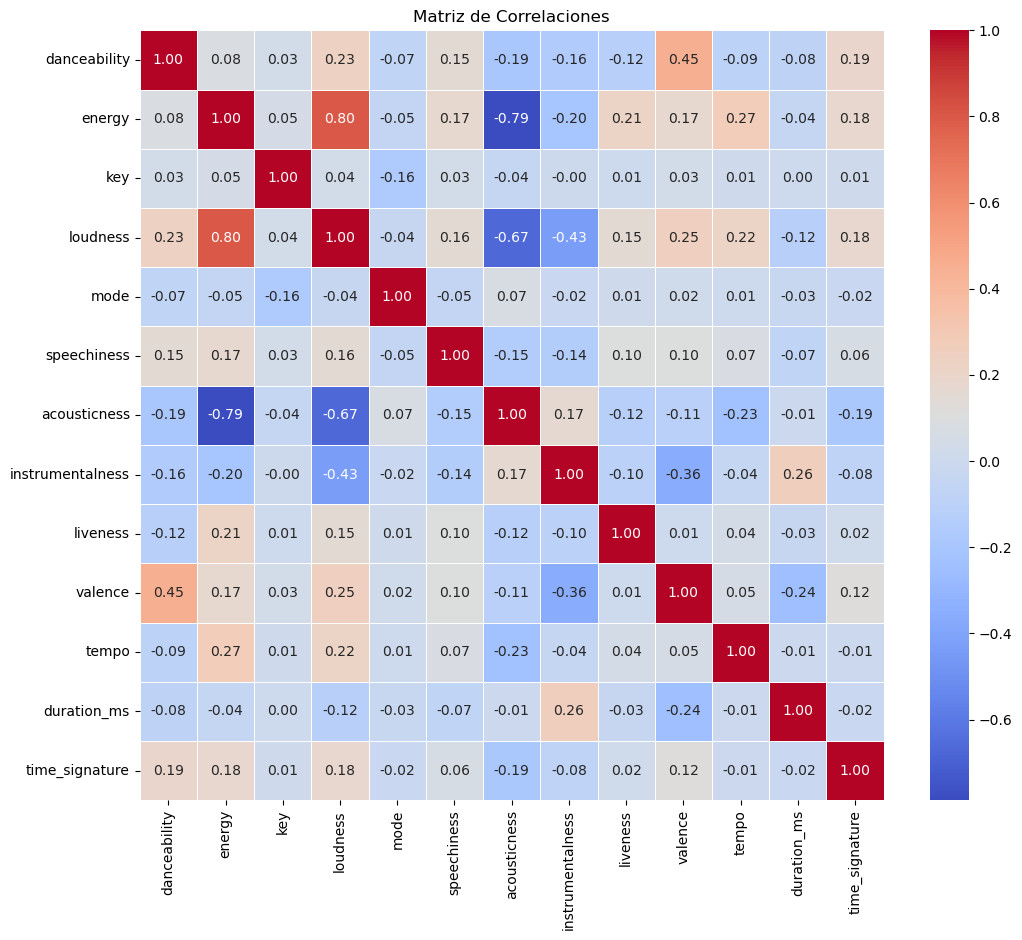

In [316]:
# Filtramos solo columnas de tipo int64 y float64
numeric_columns = df_ultimate.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlaciones
correlation_matrix = numeric_columns.corr()

# mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlaciones")
plt.show()

In [317]:
df_features = df_ultimate.drop(['track_name', 'artist_name', 'album', 'mode', 'key'], axis=1)
df_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.633,0.625,-10.951,0.0436,0.492000,0.000418,0.2040,0.8410,103.355,147800,4,blues
1,0.728,0.054,-22.557,0.0380,0.910000,0.048000,0.1200,0.4250,78.033,338333,4,blues
2,0.705,0.483,-12.209,0.0542,0.150000,0.026500,0.2020,0.7130,122.863,181786,4,blues
3,0.745,0.436,-9.617,0.0430,0.597000,0.021300,0.6100,0.7710,114.216,188200,4,blues
4,0.747,0.288,-14.435,0.0513,0.663000,0.000000,0.1220,0.5660,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...
27402,0.148,0.993,-7.696,0.0922,0.009700,0.937000,0.0376,0.0928,140.001,185142,4,electronic
27403,0.504,0.985,-7.305,0.0504,0.000810,0.922000,0.1250,0.3830,139.978,193714,4,electronic
27404,0.474,0.995,-4.265,0.0979,0.000166,0.369000,0.1500,0.0634,150.002,209600,4,electronic
27405,0.416,0.981,-3.653,0.0943,0.000079,0.928000,0.1870,0.0662,150.054,134800,3,electronic


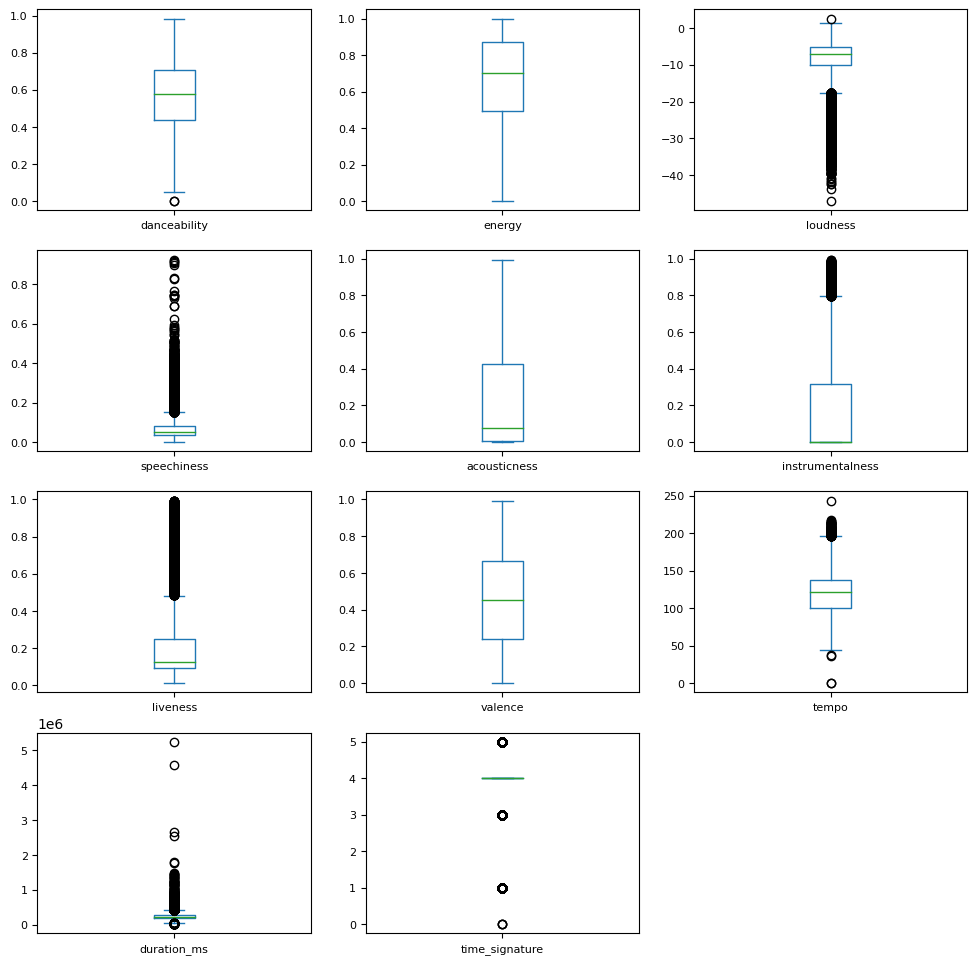

In [318]:
df_features.plot(kind='box',subplots=True, layout=(4,3), fontsize=8, figsize=(12,12));

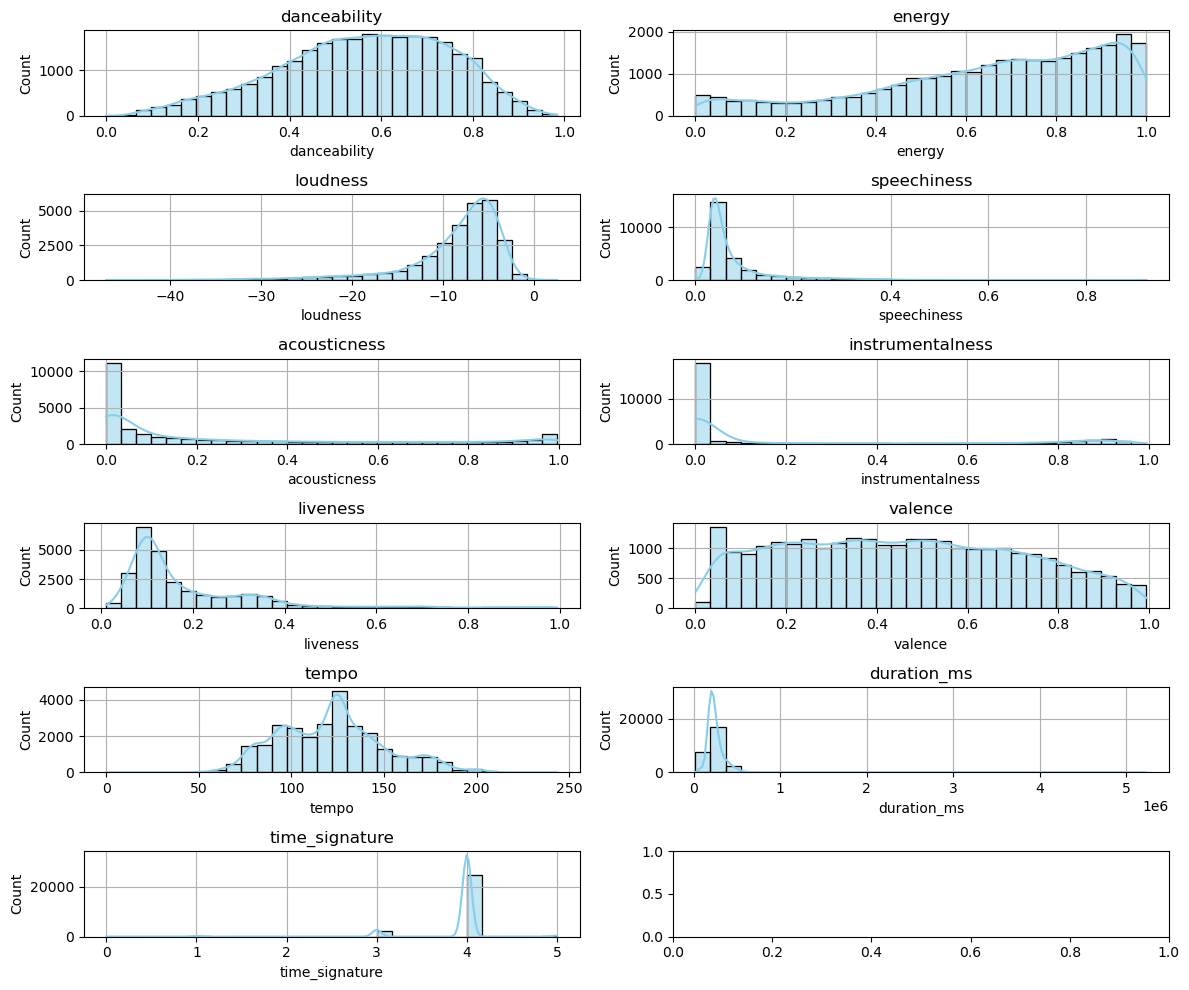

In [319]:
import math

# Filtramos solo columnas de tipo int64 y float64
columnas_numericas = df_features.select_dtypes(include=['int64', 'float64'])

# Calculamos el número necesario de filas y columnas para los subgráficos
num_plots = len(columnas_numericas.columns)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Creamos histogramas y KDE para cada columna
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df_features[columna], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axs[i // num_cols, i % num_cols])
    axs[i // num_cols, i % num_cols].set_title(columna)
    axs[i // num_cols, i % num_cols].grid(True)


fig.tight_layout()
plt.show()



In [320]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

 #Realizamos el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_features[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: danceability, Estadística: 0.985, p-valor: 0.000
Columna: energy, Estadística: 0.927, p-valor: 0.000
Columna: loudness, Estadística: 0.808, p-valor: 0.000
Columna: speechiness, Estadística: 0.650, p-valor: 0.000
Columna: acousticness, Estadística: 0.758, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.630, p-valor: 0.000
Columna: liveness, Estadística: 0.743, p-valor: 0.000
Columna: valence, Estadística: 0.967, p-valor: 0.000
Columna: tempo, Estadística: 0.987, p-valor: 0.000
Columna: duration_ms, Estadística: 0.722, p-valor: 0.000
Columna: time_signature, Estadística: 0.336, p-valor: 0.000


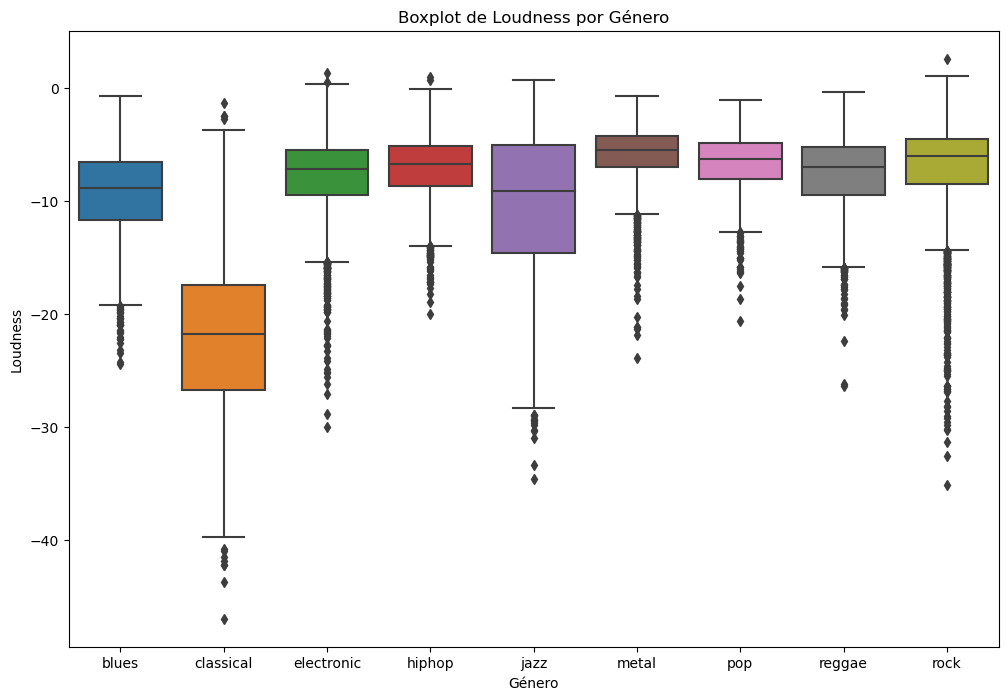

In [321]:
#  gráfico de loudness por género
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='loudness', data=df_features)
plt.title('Boxplot de Loudness por Género')
plt.xlabel('Género')
plt.ylabel('Loudness')
plt.show()

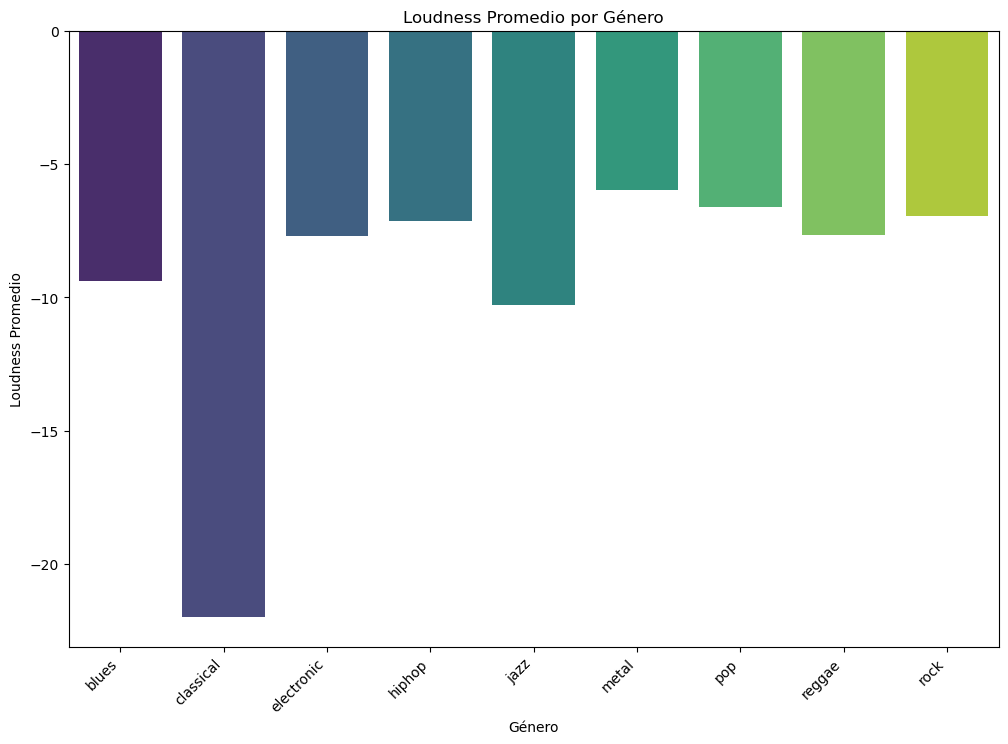

In [322]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='loudness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Loudness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

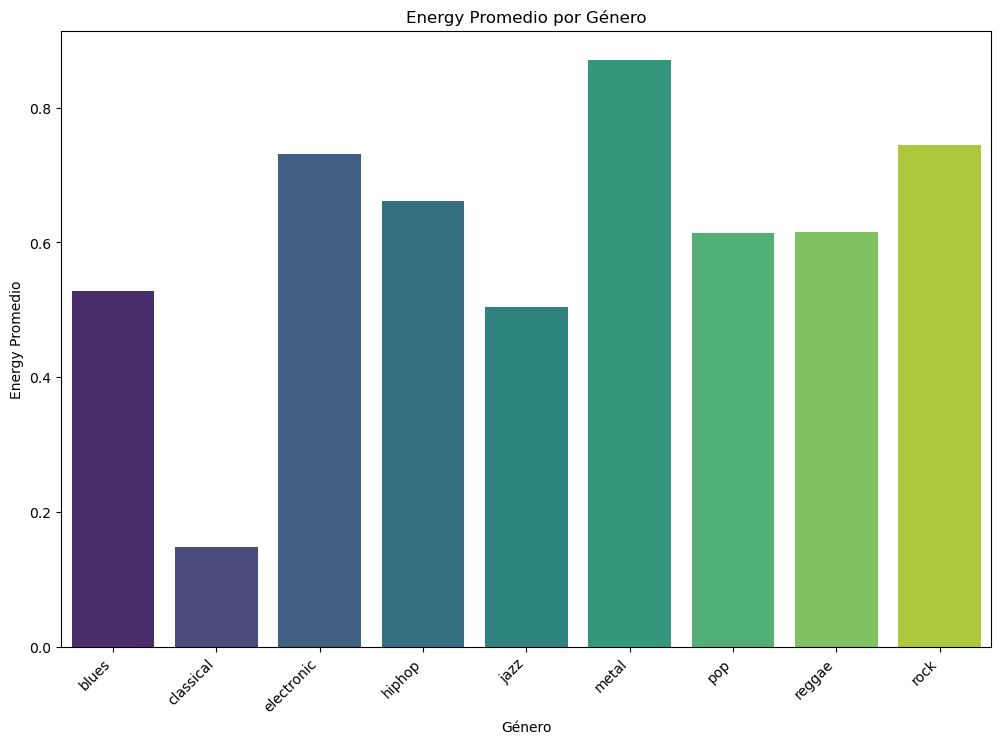

In [334]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='energy', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Energy Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Energy Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


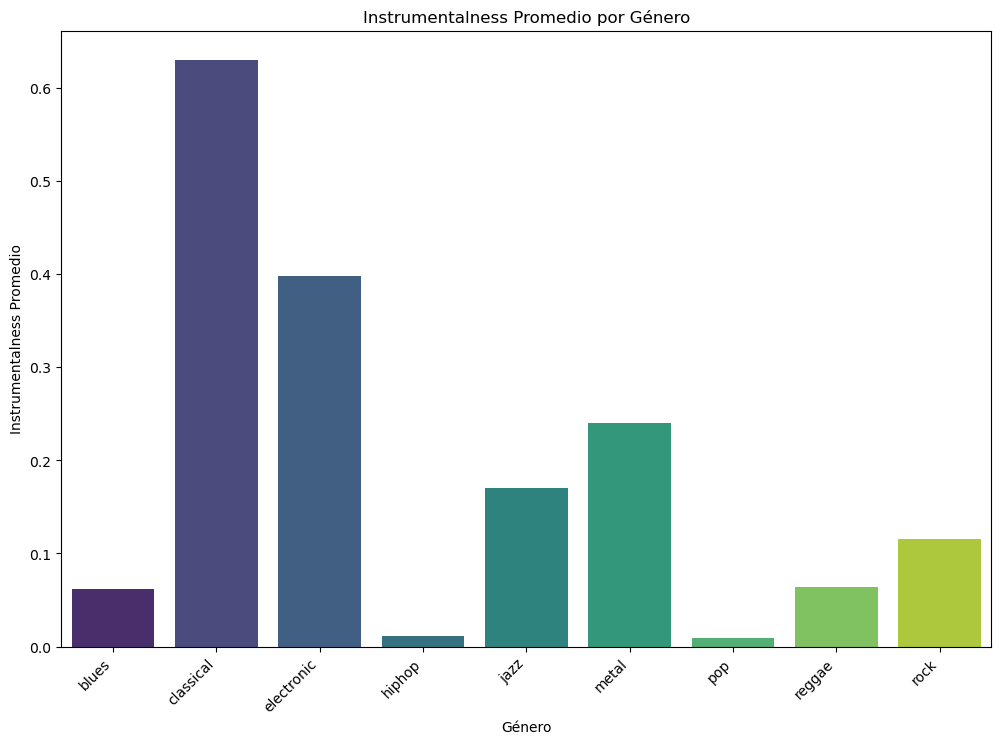

In [335]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='instrumentalness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Instrumentalness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Instrumentalness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

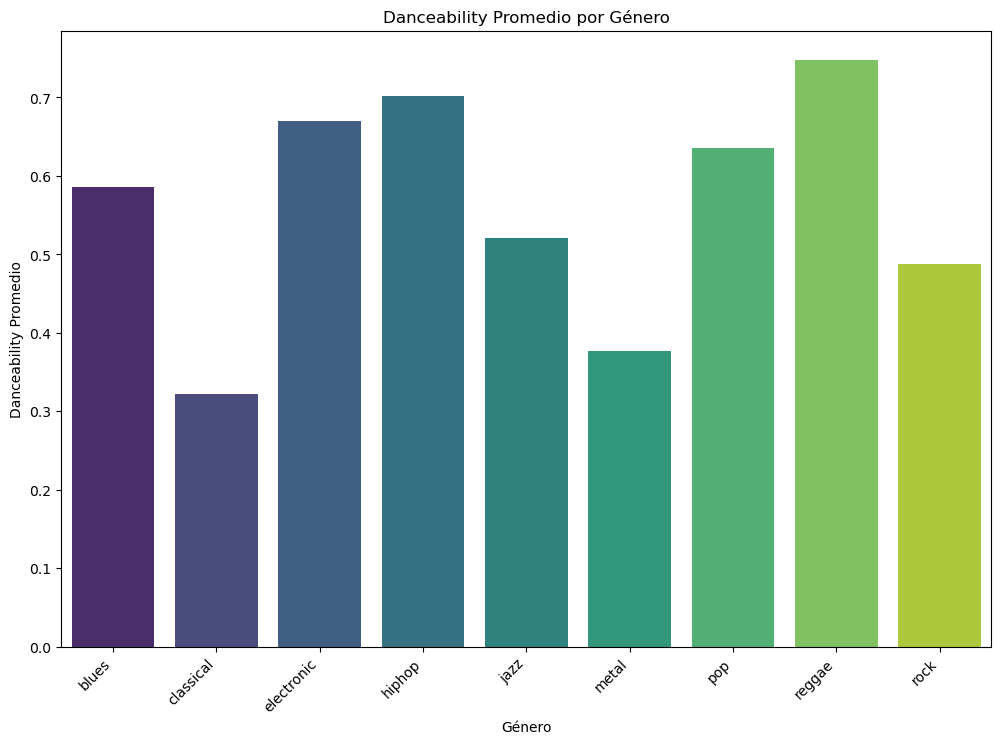

In [333]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='danceability', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Danceability Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Danceability Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler



X = df_features.drop('genre', axis=1)  
y = df_features['genre']

# Aplicamos LabelEncoder a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# Obtenemos los equivalentes originales y sus códigos
equivalentes_originales = le.classes_
codigos_asignados = le.transform(equivalentes_originales)

# Visualizamos los equivalentes originales y sus códigos
for codigo, equivalente_original in zip(codigos_asignados, equivalentes_originales):
    print(f"Código: {codigo}, Equivalente Original: {equivalente_original}")


Código: 0, Equivalente Original: blues
Código: 1, Equivalente Original: classical
Código: 2, Equivalente Original: electronic
Código: 3, Equivalente Original: hiphop
Código: 4, Equivalente Original: jazz
Código: 5, Equivalente Original: metal
Código: 6, Equivalente Original: pop
Código: 7, Equivalente Original: reggae
Código: 8, Equivalente Original: rock


In [328]:
df_features.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

In [329]:

columnas_robust_scaler = ['danceability', 'loudness', 'speechiness', 'liveness','tempo', 'duration_ms',
                         'time_signature']
columnas_minmax_scaler = ['acousticness', 'instrumentalness', 'valence', 'energy']

# Inicializamos los escaladores
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# Aplicamos RobustScaler 
X_train[columnas_robust_scaler] = robust_scaler.fit_transform(X_train[columnas_robust_scaler])
X_test[columnas_robust_scaler] = robust_scaler.transform(X_test[columnas_robust_scaler])

# Aplicamos MinMaxScaler 
X_train[columnas_minmax_scaler] = minmax_scaler.fit_transform(X_train[columnas_minmax_scaler])
X_test[columnas_minmax_scaler] = minmax_scaler.transform(X_test[columnas_minmax_scaler])


Random Forest Classifier:

In [330]:
from sklearn.ensemble import RandomForestClassifier

#Creamos el clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [331]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [332]:
from sklearn.metrics import classification_report
# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.38      0.27      0.31       380
           1       0.84      0.83      0.84       353
           2       0.74      0.76      0.75      1264
           3       0.53      0.51      0.52       495
           4       0.58      0.44      0.50       549
           5       0.64      0.41      0.50       457
           6       0.34      0.25      0.29       370
           7       0.53      0.43      0.48       296
           8       0.50      0.71      0.59      1318

    accuracy                           0.58      5482
   macro avg       0.56      0.51      0.53      5482
weighted avg       0.58      0.58      0.57      5482



El rendimiento baja. Puede que se deba a desbalanceo de clases. Quizás aplicar un SMOTE lo solucionaría en parte.

In [278]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [115]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}






In [116]:
random_search_rf = RandomizedSearchCV(rf_clf, param_dist_rf, n_iter=100, cv=5, verbose = 2, scoring='accuracy', n_jobs=-1)


In [117]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
# mejores parámetros encontrados
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados:", best_params_rf)

In [ ]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


print("Informe de clasificación:\n", classification_report(y_test, y_pred_rf))

In [ ]:
from sklearn.metrics import confusion_matrix


# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Aplicamos las predicciones a Dataset con 1.200.000 canciones aprox

In [ ]:
df_pred = pd.read_csv('/Users/alexvalles/tracks_features.csv')

df_pred

In [ ]:
df_pred.dtypes

In [ ]:
df_pred.describe()

In [ ]:
df_pred.isnull().sum()

In [ ]:
filas_con_nulos = df_pred.isnull().any(axis=1)

print("Filas con al menos un valor nulo:")
df_pred[filas_con_nulos]

In [ ]:
df_pred = df_pred.dropna()

df_pred

In [ ]:
df_pred.reset_index(drop=True, inplace=True)

df_pred

In [ ]:
df_pred['artists'] = df_pred['artists'].str.replace("[", "")
df_pred['artists'] = df_pred['artists'].str.replace("]", "")
df_pred['artists'] = df_pred['artists'].str.replace("'", "")

print(df_pred['artists'])

In [ ]:
df_pred.columns

In [ ]:
df_pred_cleaned = df_pred.drop(['id', 'name', 'album','album_id', 'artists', 'artist_ids', 'track_number',
                            'disc_number', 'explicit', 'year', 'release_date','mode',
                             'key'], axis=1)

In [ ]:
df_pred_cleaned

In [ ]:
df_pred_cleaned.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

In [ ]:
columnas_robust_scaler_2 = ['loudness', 'speechiness', 'liveness','tempo', 'duration_ms', 'time_signature']
columnas_minmax_scaler_2 = ['danceability', 'energy', 'acousticness', 'instrumentalness','valence']

In [ ]:
# Aplicamos Robust Scaler
df_pred_cleaned[columnas_robust_scaler_2] = robust_scaler.fit_transform(df_pred_cleaned[columnas_robust_scaler_2])

# Aplicamos Min Max scaler
df_pred_cleaned[columnas_minmax_scaler_2] = minmax_scaler.fit_transform(df_pred_cleaned[columnas_minmax_scaler_2])

# DataFrame con las columnas escaladas
df_pred_cleaned

In [ ]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_genres = best_model_rf.predict(df_pred_cleaned)

In [ ]:
predicted_genres

In [ ]:
df_pred['predicted_genre'] = predicted_genres

In [ ]:
df_pred

In [ ]:
df_pred.columns

In [ ]:
df_pred_final = df_pred.drop(['id', 'album_id', 'artist_ids',
       'track_number', 'disc_number', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_date', 'explicit' ], axis=1)

df_pred_final

In [ ]:
# Creamos un mapeo de géneros
genre_mapping = dict(zip(codigos_asignados, equivalentes_originales))

#  reemplazamos los códigos en el DataFrame
df_pred_final['predicted_genre'] = df_pred_final['predicted_genre'].map(genre_mapping)

df_pred_final

In [ ]:
df_pop = df_pred_final[df_pred_final['predicted_genre'] == 'pop']

artistas_pop = df_pop['artists'].unique()

df_pop

In [ ]:
df_classical= df_pred_final[df_pred_final['predicted_genre'] == 'classical']

artistas_classical = df_classical['artists'].unique()

df_classical

In [ ]:
rock_artists_df = df_pred_final.loc[df_pred_final['predicted_genre'] == 'rock']

artistas_rock = df_classical['artists'].unique()

rock_artists_df

In [ ]:
df_jazz = df_pred_final.loc[df_pred_final['predicted_genre'] == 'jazz']

artistas_jazz = df_jazz['artists'].unique()

df_jazz


In [ ]:
df_electronic = df_pred_final.loc[df_pred_final['predicted_genre'] == 'electronic']

artistas_electronic = df_electronic['artists'].unique()

df_electronic

In [ ]:
df_blues = df_pred_final[df_pred_final['predicted_genre'] == 'blues']

artistas_blues = df_blues['artists'].unique()

df_blues

In [ ]:
df_hiphop = df_pred_final[df_pred_final['predicted_genre'] == 'hiphop']

artistas_hiphop = df_hiphop['artists'].unique()

df_hiphop

In [ ]:
df_reggae = df_pred_final[df_pred_final['predicted_genre'] == 'reggae']

artistas_reggae = df_reggae['artists'].unique()

df_reggae

In [ ]:
unique_rock_artists = df_pred_final.loc[df_pred_final['predicted_genre'] == 'rock', 'artists'].unique()
unique_rock_artists.sort()

for artist in unique_rock_artists:
    print(artist)

In [ ]:
# Convertimos predicted_genres: array de NumPy a dataframe
predicted_genres_series = pd.Series(predicted_genres)

# conteo de predicciones para cada género
conteo_predicciones = predicted_genres_series.map(genre_mapping).value_counts()

conteo_predicciones

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_predicciones.index, y=conteo_predicciones.values, palette='viridis')
plt.title('Conteo de Predicciones por Género')
plt.xlabel('Género Predicho')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Nombre del grupo que queremos buscar 
grupo_buscado = 'Suede'  

# Filtrar el DataFrame para encontrar el grupo y obtener su género
genero_grupo = df_pred_final.loc[df_pred_final['artists'] == grupo_buscado, 'predicted_genre'].unique()

# Verificar si se encontró el grupo y mostrar el género
if len(genero_grupo) > 0:
    print(f"El género del grupo '{grupo_buscado}' es: {genero_grupo[0]}")
else:
    print(f"No se encontró información para el grupo '{grupo_buscado}'.")


In [ ]:
# gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pred, x="danceability", y="energy", hue="predicted_genre", palette="Set2")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Relación entre bailabilidad y energía de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show()
